# **Import Libraries**


In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import os
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# **Define Data Path**

In [47]:
dir = 'data'   # rename the dir name with your directory dataset location
path = "D:\GP\Brain_Tumot_Segmentation\data" 

In [48]:
def get_class_name():
    classes = os.listdir(dir)
    return classes

In [49]:
def define_paths(class_name):
    filepaths = []
    folder_path = os.path.join(path,class_name)
    # print(folder_path)  
    for file in os.listdir(folder_path):
        fpath = os.path.join(folder_path,file)
        # print(fpath)
        filepaths.append(fpath)
    return filepaths

# **Visualize the classes**

### plot the first four images in the folder

In [50]:
def plot_class(class_name):
    plt.figure(figsize=(12,12))
    filep = define_paths(class_name)
    for i in range(1,5):
        plt.subplot(1,4,i)
        plt.tight_layout()
        rand_img = plt.imread(filep[i])
        plt.imshow(rand_img)
        plt.title(class_name, fontsize=20, color='blue')
        plt.xticks([])
        plt.yticks([])    

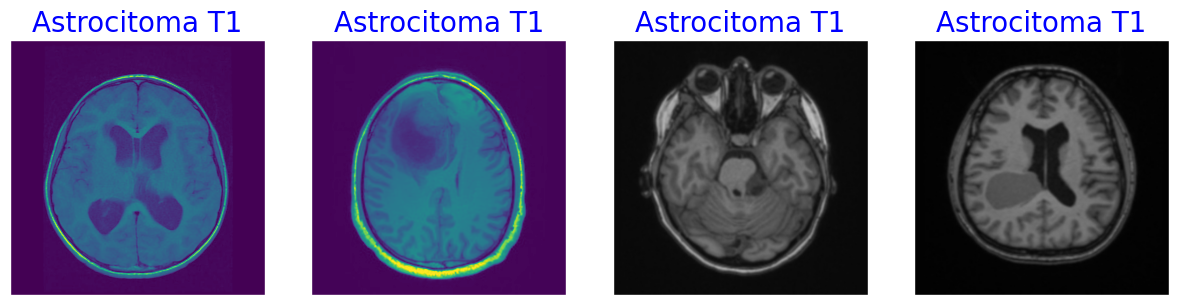

In [51]:
classes = get_class_name()
plot_class(classes[0])

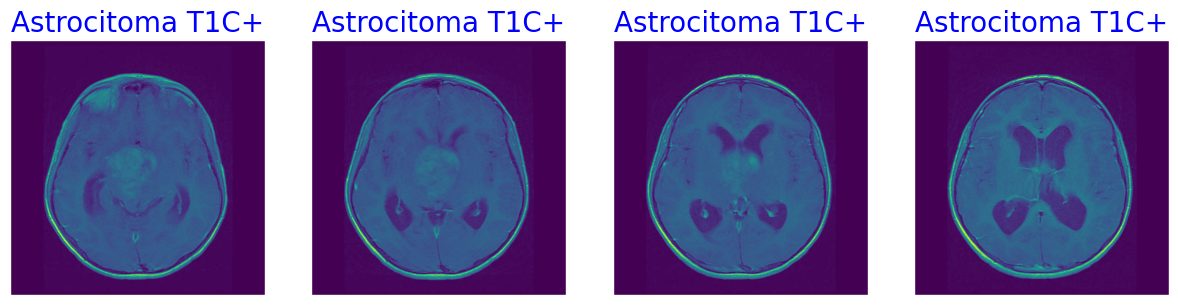

In [52]:
plot_class(classes[1])

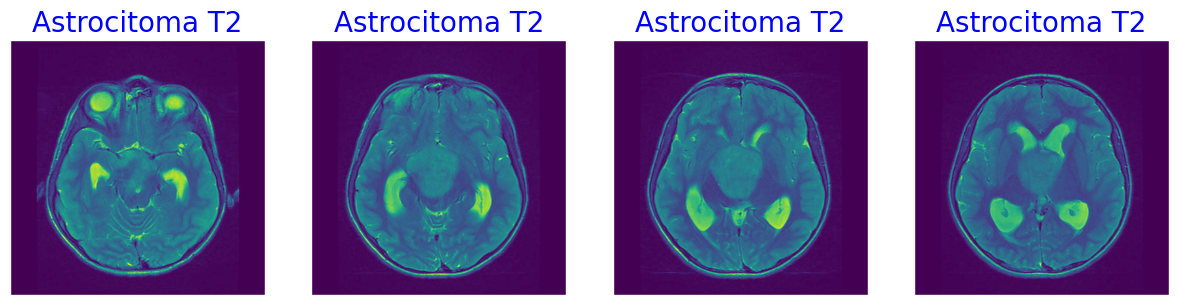

In [53]:
plot_class(classes[2])

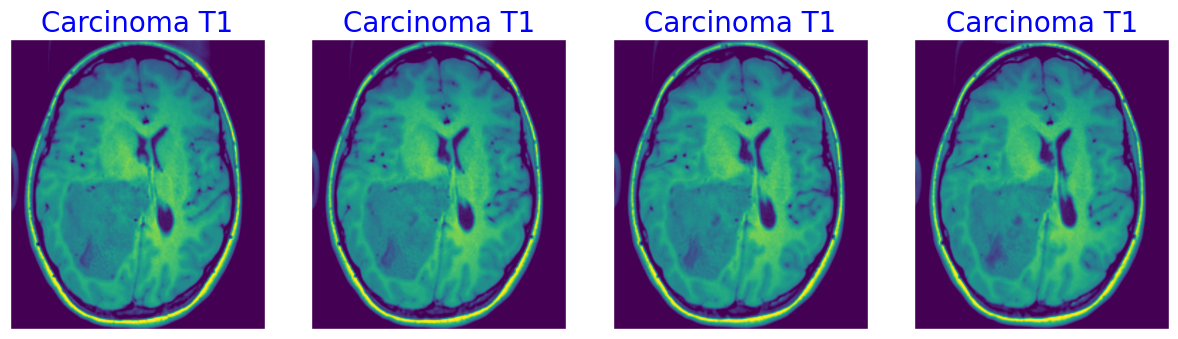

In [54]:
plot_class(classes[3])